# 상관관계 및 시각화 연습

penguins 데이터셋은 아래와 같은 정보를 담고 있다.

* species : 펭귄의 종 (Adelie, Chinstrap, Gentoo)
* island: 살고 있는 섬 이름 (Torgersen, Dream, Biscoe)
* bill_length: 부리의 길이 (단위: mm)
* bill_depth: 부리의 깊이 (단위: mm)
* flipper_length: 플리퍼(≒ 날개)의 길이 (단위: mm)
* body_mass: 체질량 (단위: g)
* sex: 성별 (MALE, FEMALE)

타이타닉 데이터셋 예제를 참고하여 아래 문제를 해결하시오


1. Adelie 펭귄과 Gentoo 펭귄의 암컷/수컷의 파이 차트를 그려보시오.


2. 펭귄의 종(Species- Adelie, Chinstrap, Gentoo)의 성별에 따른 Countplot을 그려보시오.

3. 펭귄데이터의 변수들(수치데이터) 간의 상관관계(pearson correlation)를 구하여 보시오.

In [76]:
# 필요한 패키지 import
import pandas as pd
import numpy as np

import seaborn as sns
from scipy import stats

# 데이터셋 불러오기
df = pd.read_csv('/Users/jihunjang/workspace/ust/bigdata/lecture/12/penguins.csv')
df = df.dropna()


# 데이터 프레임 column명 수정
df = df.rename(columns={"species":"species", "island":"island", "bill_length_mm":"bill_length", "bill_depth_mm":"bill_depth",
                        "flipper_length_mm":"flipper_length", "body_mass_g":"body_mass", "sex":"sex"})

In [77]:
df

,species,island,bill_length,bill_depth,flipper_length,body_mass,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [78]:
df.isnull().sum()

species           0
island            0
bill_length       0
bill_depth        0
flipper_length    0
body_mass         0
sex               0
dtype: int64

In [79]:
df.sex.value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

### 1. Adelie 펭귄과 Gentoo 펭귄의 암컷/수컷의 파이 차트를 그려보시오. (타이타닉 survived -> 펭귄 sex, 타이타닉 sex -> 펭귄 species)

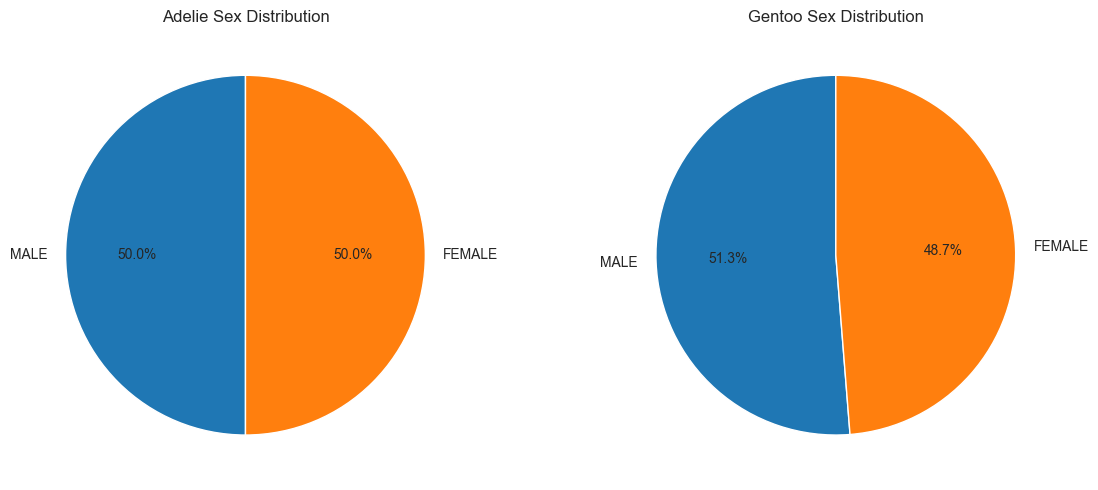

In [80]:
#여기를 완성하시오

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Adelie
adelie = df[df["species"] == "Adelie"]["sex"].value_counts()
axes[0].pie(adelie.values, labels=adelie.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Adelie Sex Distribution")

# Gentoo
gentoo = df[df["species"] == "Gentoo"]["sex"].value_counts()
axes[1].pie(gentoo.values, labels=gentoo.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Gentoo Sex Distribution")

plt.tight_layout()
plt.show()

### 2. 펭귄의 종(Species- Adelie, Chinstrap, Gentoo)의 성별에 따른 Countplot을 그려보시오. (타이타닉 x=pclass --> 펭귄 x=species)

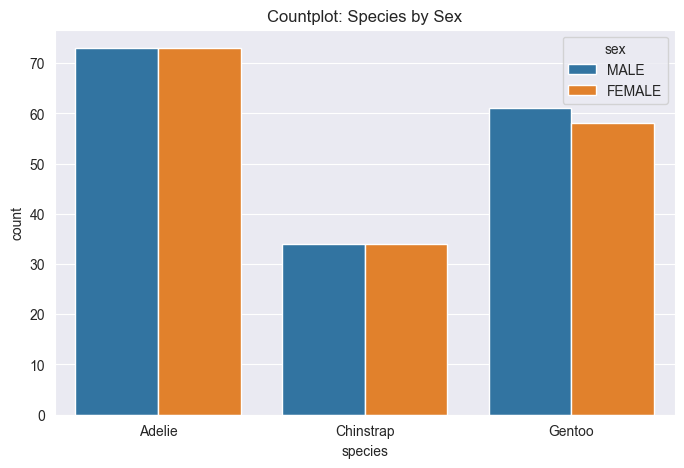

In [81]:
#여기를 완성하시오

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="species", hue="sex")
plt.title("Countplot: Species by Sex")
plt.show()

### 3. Sex attribute와 다른 변수들 간의 상관관계(pearson correlation)를 구하여 보시오.

In [82]:
#성별 attribute와 다른 변수들간의 상관관계를 계산하기 위해서 범주형 데이터를 수치형 데이터로 변환
df['sex'] = df['sex'].map({'MALE':1, 'FEMALE':0}) #성별을 male/female에서 1/0으로 치환

In [83]:
numeric_cols = ["bill_length", "bill_depth", "flipper_length", "body_mass", "sex"]


corr = df[numeric_cols].corr(method="pearson")["sex"].sort_values(ascending=False)
corr


sex               1.000000
body_mass         0.424987
bill_depth        0.372673
bill_length       0.344078
flipper_length    0.255169
Name: sex, dtype: float64

### 4. 3에서 구한 상관관계(pearson correlation)를 히트맵으로 시각화 해 보시오

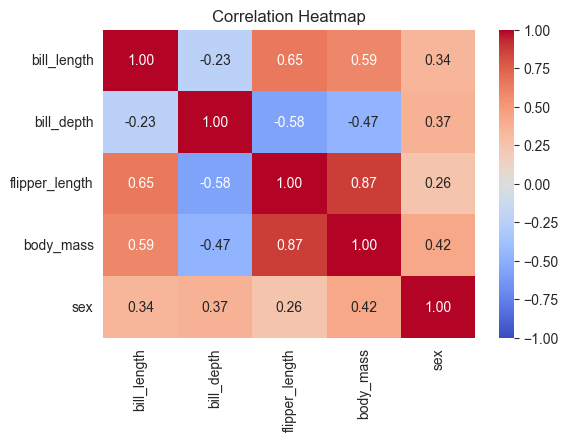

In [84]:
#여기를 완성하시오
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", vmax=1, vmin=-1)
plt.title("Correlation Heatmap")
plt.show()


# 완성시 Colab 노트북 파일(ipynb)을 wonsukim7@gmail.com 으로 공유
# 노트북 이름에 소속과 성명을 반드시 기재할 것